In [180]:
import pandas as pd
import getpass
import sqlalchemy as sa
import numpy as np
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Importing Dataset.

In [181]:
hp_df_org = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/Houseprices/Data/house_price_df.csv')
hp_df = hp_df_org

## EDA

In [182]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The Dataset consists of 21597 Houses containing 21 features. Price is to be the predicted variables. 

In [183]:
hp_df[['bedrooms', 'sqft_living',  'sqft_lot', 'yr_built', 'price']].describe()

,bedrooms,sqft_living,sqft_lot,yr_built,price
count,21597.000000,21597.000000,2.159700e+04,21597.000000,2.159700e+04
mean,3.373200,2080.321850,1.509941e+04,1970.999676,5.402966e+05
std,0.926299,918.106125,4.141264e+04,29.375234,3.673681e+05
min,1.000000,370.000000,5.200000e+02,1900.000000,7.800000e+04
25%,3.000000,1430.000000,5.040000e+03,1951.000000,3.220000e+05
50%,3.000000,1910.000000,7.618000e+03,1975.000000,4.500000e+05
75%,4.000000,2550.000000,1.068500e+04,1997.000000,6.450000e+05
max,33.000000,13540.000000,1.651359e+06,2015.000000,7.700000e+06


The average house has about 3 bedrooms, 2080 sqft of living area, a lot size of 15000 sqft, was built in 1970 and has a price of 540000 $. The mean and the median differ alot in the variable sqft lot, where the median is much lower then the mean. This leads to the conculusion that many houses don't have a big lot but a few house with a big lot change the distribution.

In [184]:
print(hp_df['date'].min(), hp_df['date'].max())

2014-05-02 2015-05-27


The date variable displays the date when the house was sold. Data is between May 2014 and May 2015. 

In [185]:
hp_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Most houses have 2,5 bathrooms, a lot also only . A view outliers have a very high number of bathrooms.

## Location

For the location the datasets offers three features. Latitute and Longitude (only useful combined) and zipcodes. Let's look at both of them.

In [186]:
# sns.jointplot(data=hp_df, x='long', y='lat', hue = 'sqft_lot').set(title='Lot size and geographical location')

Looking at the geographical location of the houses and displaying the lot size it is visual, that the properties at the are outskirts and the countryside get bigger. 

In [187]:
# sns.jointplot(data=hp_df, x='long', y='lat', hue = 'zipcode').set(title='Zipcode and geographical location')

The zipcodes are not in a logicla order so the variables should not be used as a numerical variables.
And alternative idea would be to use the travel distance from the house to the city center.

## Year renovated

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

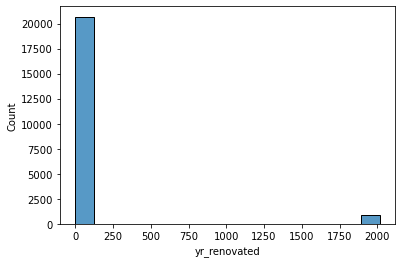

In [188]:
sns.histplot(data=hp_df, x='yr_renovated')

The year renovated displays a 0 if the house was not yet renovated. This is not useful information in a linear regression. 

Workaround:

introduce boolean variable: Renovated: Yes/N0
Put zero values as No  


In [189]:
hp_df['renovated'] = bool

In [190]:
hp_df['yr_renovated'] == 0

0         True
1        False
2         True
3         True
4         True
         ...  
21592     True
21593     True
21594     True
21595     True
21596     True
Name: yr_renovated, Length: 21597, dtype: bool

In [191]:
hp_df.loc[hp_df['yr_renovated'] == 0, 'renovated'] = False

In [192]:
hp_df.loc[hp_df['yr_renovated'] != 0, 'renovated'] = True

<AxesSubplot:xlabel='yrs_since_ren', ylabel='Count'>

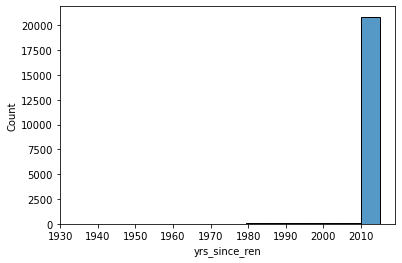

In [107]:
sns.histplot(hp_df['yrs_since_ren'])

## Basement

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

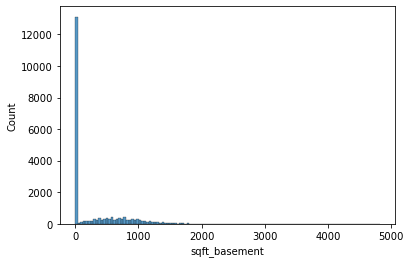

In [194]:
sns.histplot(data=hp_df, x='sqft_basement')

Most Houses don't have a basement, so a dummy will be introduced checking for basement or not:

In [195]:
hp_df.loc[hp_df['sqft_basement'] == 0, 'basement'] = False
hp_df.loc[hp_df['sqft_basement'] != 0, 'basement'] = True

## Dropping columns:

For now the columns Unnamed, id, date and long, lat will be dropped from the dataframe.

In [196]:
col_drop = ['Unnamed: 0',\
            'id',\
            'date',\
           'long',\
           'lat']   
# 'Unnamed: 0' : id from import without information
# 'id': random or consequtive values without values
# 'date': probably the date the house was added to the database, no additional information for houseprice
# 'lang', 'lat': Geografical data, not usable in linear regression like this, can be converted to zones using knn. 
#    Task for later. But zip codes are enough, probably


In [197]:
hp_df = hp_df.drop(col_drop, axis= 1)

## Changing datatypes


The format of the features are mostly numerical (int or float). Many of the variables have to be transformed to category to give meaningful results in a regression.
These are:

'zipcode, 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'

In [198]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  price          21597 non-null  int64  
 17  renovated      21597 non-null  object 
 18  baseme

In [199]:
# From the pairplot we can see which columns are categorical/dummies:
#  bderooms, bathrooms, floors, waterfront, view, condition, grade
ordinal_var = ['zipcode', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
hp_df[ordinal_var] = hp_df[ordinal_var].astype('category')
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21597 non-null  category
 1   bathrooms      21597 non-null  category
 2   sqft_living    21597 non-null  int64   
 3   sqft_lot       21597 non-null  int64   
 4   floors         21597 non-null  category
 5   waterfront     21597 non-null  category
 6   view           21597 non-null  category
 7   condition      21597 non-null  category
 8   grade          21597 non-null  category
 9   sqft_above     21597 non-null  int64   
 10  sqft_basement  21597 non-null  int64   
 11  yr_built       21597 non-null  int64   
 12  yr_renovated   21597 non-null  int64   
 13  zipcode        21597 non-null  category
 14  sqft_living15  21597 non-null  int64   
 15  sqft_lot15     21597 non-null  int64   
 16  price          21597 non-null  int64   
 17  renovated      21597 non-null  

In [111]:
hp_df.shape

(21597, 17)

## Checking correlation of numerical variables

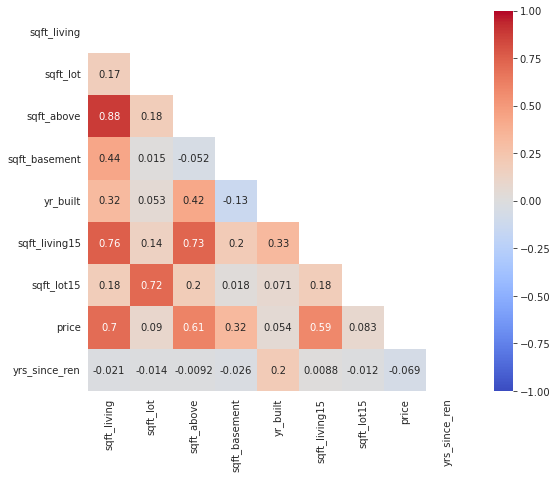

In [112]:
corr = hp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

The features should not be correlated in order to fulfill the asumtions of linear regression.
As expected there is a lot of correlation between sqf_above, sqf_living and other measures of size. 
- First: Drop sqf_above

In [113]:
corr_matrix=hp_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corr_var = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
hp_df = hp_df.drop(corr_var, axis= 1)
hp_df.shape

(21597, 16)

The Dataframe is reduced from 21 columns to 16 columns.

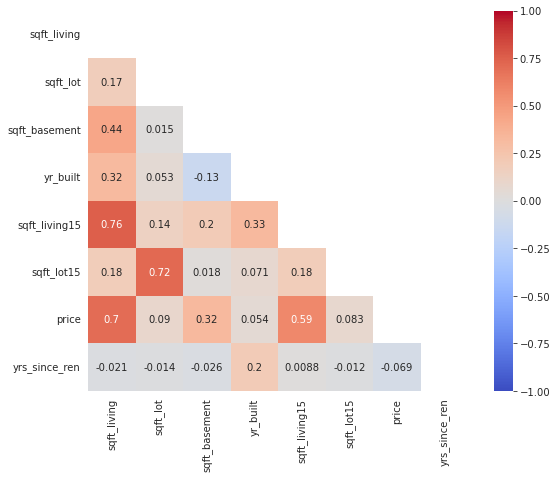

In [114]:
corr = hp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

The new dataframe does not contain anymore variables with a higher correlation than 0.8, but some variable still have high correlation which could be analysed later.

# Normalization

## Histograms
To check for the assumtion of normal distributions we check the histograms of the numerical variables

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'yrs_since_ren'}>, <AxesSubplot:>]],
      dtype=object)

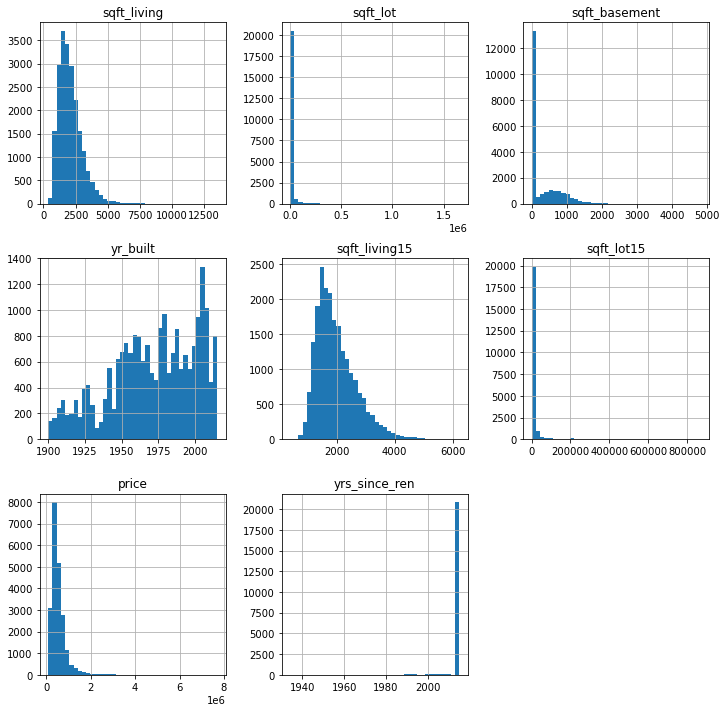

In [115]:
hp_df.select_dtypes('int').hist(figsize=(12,12), bins=40)


All numerical varibales are non-normaly distributed and need to be transformed. 

## Transforming to normal distribution

In [116]:
hp_df.select_dtypes(['int64','float']).columns

Index(['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'price', 'yrs_since_ren'],
      dtype='object')

In [117]:
# List of variables names to be transformed: 
to_trans =  {'sqft_living': 'qt',\
             'sqft_lot': 'qt',\
             'yr_built': 'qt',\
             'sqft_basement': 'qt',\
             'yrs_since_ren': 'qt',\
             'sqft_living15': 'qt',\
             'sqft_lot15': 'qt'}

,price,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_basement_transformed,yrs_since_ren_transformed,sqft_living15_transformed,sqft_lot15_transformed
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,0.000009,-0.000043,-0.007133,-2.771765,4.894274,0.000007,-0.000060
std,3.673681e+05,0.999686,0.999566,1.046026,3.037154,1.466526,0.999868,1.000081
min,7.800000e+04,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,3.220000e+05,-0.667419,-0.676854,-0.689529,-5.199338,5.199338,-0.665852,-0.673702
50%,4.500000e+05,-0.003764,0.000418,0.003764,-5.199338,5.199338,0.001255,0.000000
75%,6.450000e+05,0.675277,0.674710,0.681594,0.670557,5.199338,0.670557,0.674476
max,7.700000e+06,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


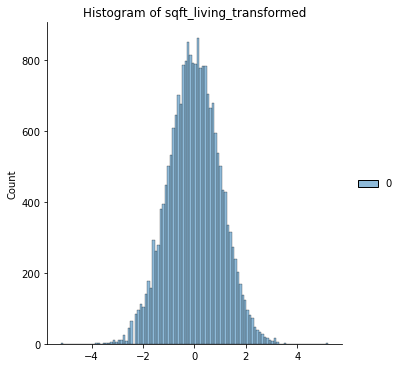

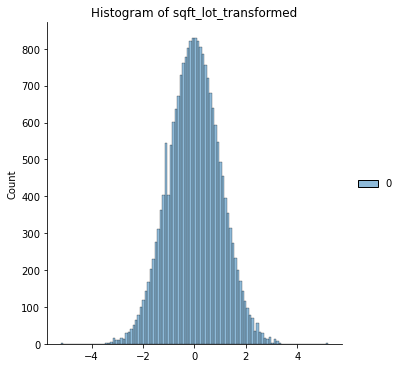

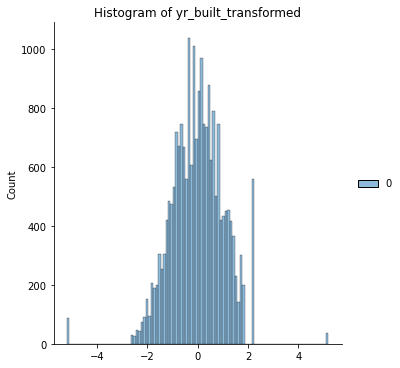

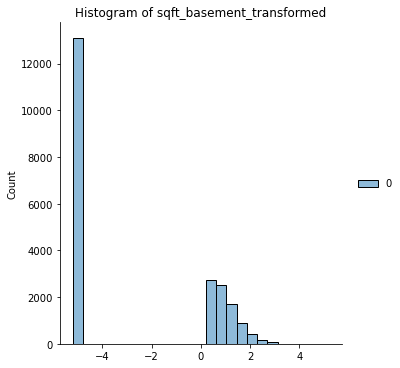

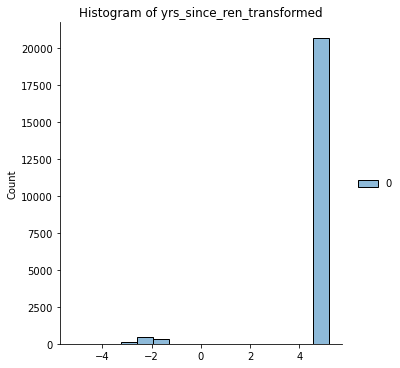

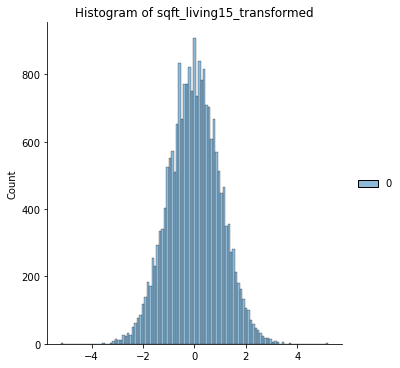

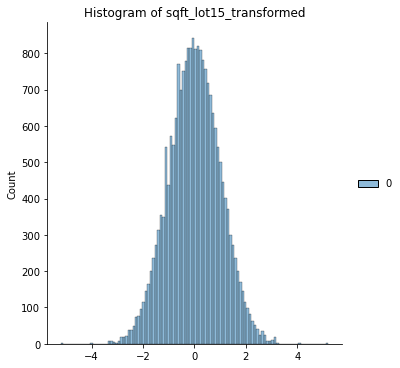

In [118]:

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")

transformed_cols = []
for i in to_trans.keys():
    if list(to_trans.values())[0] == 'pt':
        transformed = pt.fit_transform(hp_df[i].to_numpy().reshape(-1,1))
    elif list(to_trans.values())[0] == 'qt':
        transformed = qt.fit_transform(hp_df[i].to_numpy().reshape(-1,1))
    else: 
        print('no transformer could be identified')
    col_name = i+'_transformed'
    sns.displot(transformed).set(title=f'Histogram of {col_name}')
    hp_df[col_name] = transformed
    transformed_cols = transformed_cols + [col_name]
    hp_df = hp_df.drop(i, axis= 1)
    
    
hp_df.describe()

In [119]:
transformed_cols

['sqft_living_transformed',
 'sqft_lot_transformed',
 'yr_built_transformed',
 'sqft_basement_transformed',
 'yrs_since_ren_transformed',
 'sqft_living15_transformed',
 'sqft_lot15_transformed']

In [120]:
hp_df.describe()

,price,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_basement_transformed,yrs_since_ren_transformed,sqft_living15_transformed,sqft_lot15_transformed
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,0.000009,-0.000043,-0.007133,-2.771765,4.894274,0.000007,-0.000060
std,3.673681e+05,0.999686,0.999566,1.046026,3.037154,1.466526,0.999868,1.000081
min,7.800000e+04,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,3.220000e+05,-0.667419,-0.676854,-0.689529,-5.199338,5.199338,-0.665852,-0.673702
50%,4.500000e+05,-0.003764,0.000418,0.003764,-5.199338,5.199338,0.001255,0.000000
75%,6.450000e+05,0.675277,0.674710,0.681594,0.670557,5.199338,0.670557,0.674476
max,7.700000e+06,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [121]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bedrooms                   21597 non-null  category
 1   bathrooms                  21597 non-null  category
 2   floors                     21597 non-null  category
 3   waterfront                 21597 non-null  category
 4   view                       21597 non-null  category
 5   condition                  21597 non-null  category
 6   grade                      21597 non-null  category
 7   zipcode                    21597 non-null  category
 8   price                      21597 non-null  int64   
 9   sqft_living_transformed    21597 non-null  float64 
 10  sqft_lot_transformed       21597 non-null  float64 
 11  yr_built_transformed       21597 non-null  float64 
 12  sqft_basement_transformed  21597 non-null  float64 
 13  yrs_since_ren_transformed  2159

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living_transformed'}>,
        <AxesSubplot:title={'center':'sqft_lot_transformed'}>],
       [<AxesSubplot:title={'center':'yr_built_transformed'}>,
        <AxesSubplot:title={'center':'sqft_basement_transformed'}>,
        <AxesSubplot:title={'center':'yrs_since_ren_transformed'}>],
       [<AxesSubplot:title={'center':'sqft_living15_transformed'}>,
        <AxesSubplot:title={'center':'sqft_lot15_transformed'}>,
        <AxesSubplot:>]], dtype=object)

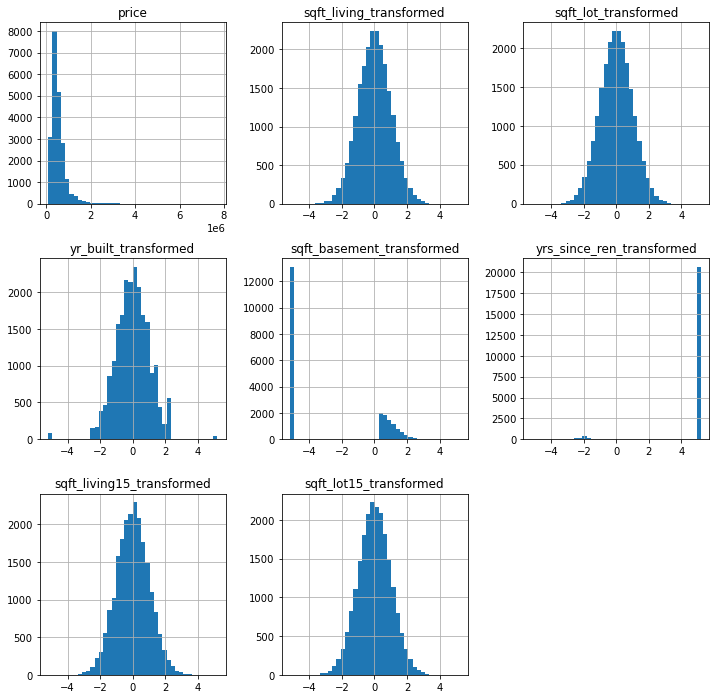

In [122]:
hp_df.select_dtypes(['int', 'float64']).hist(figsize=(12,12), bins=40)

## One-hot encode categorical variables

In [123]:
col_names_object = list(hp_df.select_dtypes(["object" and 'category']).columns)
col_names_object

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [124]:
cat_features =  pd.get_dummies(hp_df[col_names_object] , drop_first=True)

In [125]:
hp_df = hp_df.drop(col_names_object, axis = 1)

In [126]:
hp_df[cat_features.columns] = cat_features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\1451664032.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hp_df[cat_features.columns] = cat_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\1451664032.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hp_df[cat_features.columns] = cat_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\1451664032.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\1451664032.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hp_df[cat_features.columns] = cat_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\1451664032.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hp_df[cat_features.columns] = cat_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\1451664032.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [127]:
hp_df.columns

Index(['price', 'sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'sqft_basement_transformed',
       'yrs_since_ren_transformed', 'sqft_living15_transformed',
       'sqft_lot15_transformed', 'bedrooms_2', 'bedrooms_3',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=140)

## Remove outliers

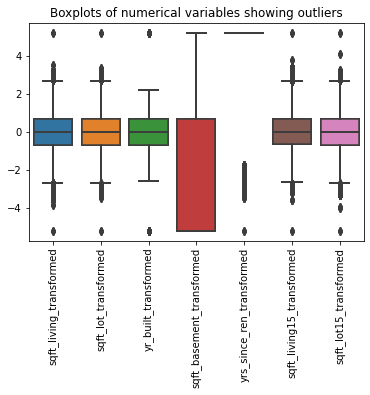

In [128]:
for i in transformed_cols:
    sns.boxplot(data=hp_df[transformed_cols]).set(title='Boxplots of numerical variables showing outliers')
    plt.xticks(rotation=90)

In [129]:
 len_before = hp_df.shape[0]

In [130]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-2*iqr
    fence_high = q3+2*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#for i in transformed_cols: 
#    hp_df = remove_outlier(hp_df, i )

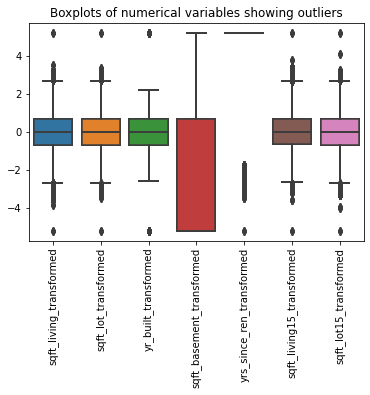

In [131]:
for i in transformed_cols:
    sns.boxplot(data=hp_df[transformed_cols]).set(title='Boxplots of numerical variables showing outliers')
    plt.xticks(rotation=90)

In [132]:
len_after = hp_df.shape[0]

In [133]:
print(f'Of the original dataset {round(len_after/len_before * 100, 2)}% of rows remain')

Of the original dataset 100.0% of rows remain


## 1st Model only using numerical variables

###  1) Split X-y

In [134]:
X=hp_df.drop('price', axis=1)
y=hp_df['price']


In [135]:
X

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_basement_transformed,yrs_since_ren_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.109378,-0.517790,-0.549616,-5.199338,5.199338,-1.037937,-0.517790,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.694311,-0.115464,-0.689529,0.492137,-2.196894,-0.247134,0.007616,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-2.131682,0.562796,-1.118711,-5.199338,5.199338,1.064091,0.154186,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.051460,-0.718462,-0.247134,1.192071,5.199338,-0.985610,-0.744694,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.293986,0.128003,0.368215,-5.199338,5.199338,-0.062770,-0.040336,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.509202,-2.132221,1.529558,-5.199338,5.199338,-0.573115,-1.831578,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21593,0.436240,-0.475178,2.183092,-5.199338,5.199338,-0.012546,-0.165095,0,0,1,...,1,0,0,0,0,0,0,0,0,0
21594,-1.428482,-1.837261,1.529558,-5.199338,5.199338,-2.043115,-1.644085,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,-0.406079,-1.515547,1.008294,-5.199338,5.199338,-0.862544,-2.068024,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X=X.drop(cat_features.columns, axis=1)

In [137]:
X.columns

Index(['sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'sqft_basement_transformed',
       'yrs_since_ren_transformed', 'sqft_living15_transformed',
       'sqft_lot15_transformed'],
      dtype='object')

In [138]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [139]:
X_train

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_basement_transformed,yrs_since_ren_transformed,sqft_living15_transformed,sqft_lot15_transformed
8816,0.132113,-0.079120,0.069056,1.068522,5.199338,0.161281,-0.101796
15679,0.153660,-0.429351,-1.844811,0.601439,5.199338,-0.096753,-1.128144
3091,0.165095,-0.052435,0.439001,-5.199338,5.199338,0.809168,0.049486
4410,0.269184,1.424313,0.513491,-5.199338,5.199338,0.243255,0.803958
14938,-1.968165,2.683605,-1.152175,-5.199338,-2.325972,-0.457033,0.192717
...,...,...,...,...,...,...,...
16304,-0.084155,1.127559,0.439001,-5.199338,5.199338,0.104318,1.199046
79,1.425011,1.585639,0.875354,-5.199338,5.199338,1.684464,1.697533
12119,-0.338834,0.551527,-0.186756,0.670557,5.199338,-0.502074,0.624145
14147,-0.015055,1.176446,-0.143512,0.752997,5.199338,0.116941,1.161976


### Standardize

In [140]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [141]:
X_train.shape

(15117, 7)

In [142]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled.shape

(6480, 7)

## Linear Regression

In [143]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1698.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:56:36   Log-Likelihood:            -2.1049e+05
No. Observations:               15117   AIC:                         4.210e+05
Df Residuals:                   15109   BIC:                         4.211e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.427e+05   2194.709    247.269      0.0

In [144]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [145]:
model.coef_

array([189962.25142211, -35395.28878474, -58071.92355069,   7097.09050248,
       -20052.35071363,  87475.9253914 ,  -6846.90827701])

In [146]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [147]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

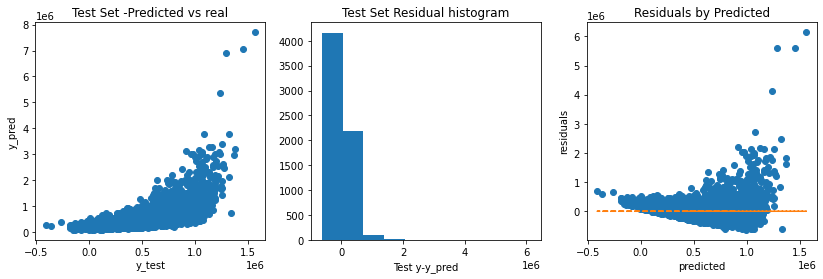

In [148]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [149]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  86976369332.80841
MAE test:  178063.72416025482
MSE train:  72776224693.40318
RMSE test:  421.975975809352
R2_test:  0.4059649735418869
R2_train:  0.4402705379315587
MSE train - MSE test:  -14200144639.405228
R2_test/R2_train:  0.9220807175723289
Adj_R2: 0.4053224758309464


In [150]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [151]:
features_importances

,Attribute,Importance
0,sqft_living_transformed,189962.251422
5,sqft_living15_transformed,87475.925391
2,yr_built_transformed,58071.923551
1,sqft_lot_transformed,35395.288785
4,yrs_since_ren_transformed,20052.350714
3,sqft_basement_transformed,7097.090502
6,sqft_lot15_transformed,6846.908277


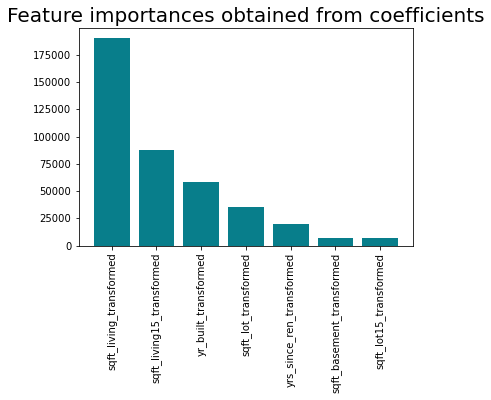

In [152]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 2nd model including categorical variables

In [153]:
def Xy_split(df, output_col):
    """ Split the dataset into:
        X = dataframe of input variables
        y = predicted variable
    """
    X=df.drop(output_col, axis=1)
    y=df[output_col]
    print(X.columns)
    return X, y

X,y = Xy_split(hp_df, 'price') 

Index(['sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'sqft_basement_transformed',
       'yrs_since_ren_transformed', 'sqft_living15_transformed',
       'sqft_lot15_transformed', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=139)


In [154]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [155]:
std_scaler=StandardScaler().fit(X_train.select_dtypes(['int', 'float64']))   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train.select_dtypes(['int', 'float64']))

X_test_scaled=std_scaler.transform(X_test.select_dtypes(['int', 'float64']))
X_test_scaled.shape

(6480, 7)

In [156]:
X_train

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_basement_transformed,yrs_since_ren_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
8816,0.132113,-0.079120,0.069056,1.068522,5.199338,0.161281,-0.101796,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15679,0.153660,-0.429351,-1.844811,0.601439,5.199338,-0.096753,-1.128144,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3091,0.165095,-0.052435,0.439001,-5.199338,5.199338,0.809168,0.049486,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4410,0.269184,1.424313,0.513491,-5.199338,5.199338,0.243255,0.803958,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14938,-1.968165,2.683605,-1.152175,-5.199338,-2.325972,-0.457033,0.192717,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,-0.084155,1.127559,0.439001,-5.199338,5.199338,0.104318,1.199046,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79,1.425011,1.585639,0.875354,-5.199338,5.199338,1.684464,1.697533,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12119,-0.338834,0.551527,-0.186756,0.670557,5.199338,-0.502074,0.624145,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14147,-0.015055,1.176446,-0.143512,0.752997,5.199338,0.116941,1.161976,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train[list(cat_features.columns)])), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test[list(cat_features.columns)])), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

(15117, 139) (6480, 139)


In [158]:
print(y_train.shape, y_test.shape)

(15117,) (6480,)


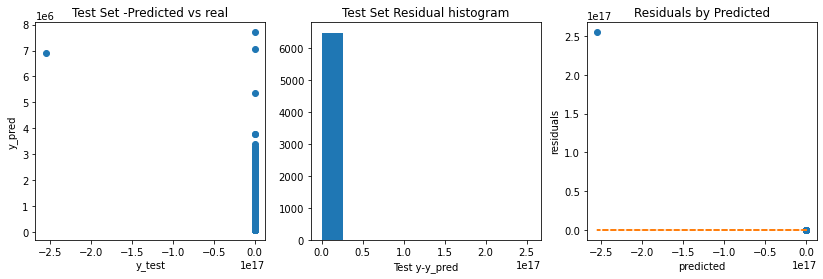

In [159]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 


y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [160]:
y_test

7189      900000
2751      346950
17077     305000
15151     507000
985       283000
          ...   
11524     550000
20461     355000
4102     1040000
3415      245000
12154     718000
Name: price, Length: 6480, dtype: int64

In [161]:
#sns.jointplot(y_pred, y_test)

In [162]:
#sns.jointplot(x=y_pred,y = (y_test - y_pred))

In [163]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  1.0011409557084133e+31
MAE test:  39306114253977.6
MSE train:  21325000664.95451
RMSE test:  6269458.8485751785
R2_test:  -6.837636460047269e+19
R2_train:  0.8359872169641949
MSE train - MSE test:  -1.0011409557084133e+31
R2_test/R2_train:  -8.179116045431259e+19
Adj_R2: -6.987546786221807e+19


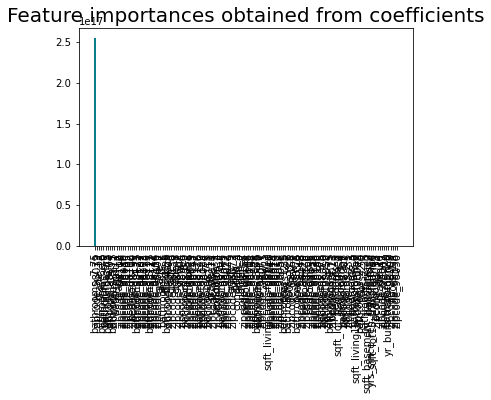

In [164]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Get P-values from model 

To filter the significant columns we get the p-value from the linear regression. If it is higher than 0.5 the column is dropped.

In [165]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     553.2
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:56:42   Log-Likelihood:            -2.0122e+05
No. Observations:               15117   AIC:                         4.027e+05
Df Residuals:                   14978   BIC:                         4.038e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.375e+05   1.85e+05      2.368      0.0

In [171]:
sign_cols = model.pvalues[1:len(model.pvalues)]  # remove constant

sign_cols

x1      8.172191e-247
x2       1.284387e-16
x3       7.039689e-03
x4       3.209127e-15
x5       1.162904e-14
            ...      
x135     1.657814e-53
x136     5.540359e-03
x137     4.441404e-02
x138     9.235709e-01
x139    2.078035e-173
Length: 139, dtype: float64

Pseudo-Code: for i in range(0, len(X.column)) drop X.columns[i] if sign_cols[i]> 0.05
        

In [172]:
sign_cols = pd.DataFrame([sign_cols])
sign_cols

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139
0,8.172191e-247,1.284387e-16,0.00704,3.209127e-15,1.162904e-14,9.165493e-15,0.00466,0.442266,0.221295,0.055768,...,4.947710e-13,0.025047,6.063078e-30,0.000003,0.000307,1.657814e-53,0.00554,0.044414,0.923571,2.078035e-173


In [168]:
len(X.columns)

139

In [169]:
sign_cols.iloc[0,:]>0.05

x1      False
x2      False
x3      False
x4      False
x5      False
        ...  
x135    False
x136    False
x137    False
x138     True
x139    False
Name: 0, Length: 139, dtype: bool

In [173]:
X_col_list = X.columns
X_dropped_p = X
for i in range(0,len(X.columns)):
    if sign_cols.iloc[0,i]>0.05:
        X_dropped_p = X_dropped_p.drop(X_col_list[i], axis=1)
        print('Variables dropped: ', X.columns[i], sign_cols.iloc[0,i])

Variables dropped:  bedrooms_2 0.44226610603840455
Variables dropped:  bedrooms_3 0.22129500987075898
Variables dropped:  bedrooms_4 0.05576826607854408
Variables dropped:  bedrooms_5 0.05050406345634087
Variables dropped:  bedrooms_8 0.2663135583217885
Variables dropped:  bedrooms_9 0.09646416724990435
Variables dropped:  bedrooms_11 0.8386209101932129
Variables dropped:  bedrooms_33 0.9516678507366306
Variables dropped:  bathrooms_0.75 0.5359571021245302
Variables dropped:  bathrooms_1.0 0.9500397109120499
Variables dropped:  bathrooms_1.25 0.4855159375290048
Variables dropped:  bathrooms_1.5 0.8074884692711927
Variables dropped:  bathrooms_1.75 0.7733668994935688
Variables dropped:  bathrooms_2.0 0.7649924897310308
Variables dropped:  bathrooms_2.25 0.8970968254683659
Variables dropped:  bathrooms_2.5 0.8541087257724961
Variables dropped:  bathrooms_2.75 0.8829907180345671
Variables dropped:  bathrooms_3.0 0.877094712766159
Variables dropped:  bathrooms_3.25 0.5102780095795252
Varia

In [174]:
print(X.shape, X_dropped_p.shape)

(21597, 139) (21597, 91)


From 69 initial variables, 34 remain.

## 3d linear Model only including variabels that had a siginificant p-value in the 2s Model

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_dropped_p, y, test_size=.30,random_state=100)

In [ ]:
X_train_num = X_train.select_dtypes(['float64'])
X_test_num = X_test.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(['uint8'])
X_test_cat = X_test.select_dtypes(['uint8'])
print(X_train_num.shape, X_test_num.shape, X_train_cat.shape, X_test_cat.shape)

In [ ]:
X_train.info()

In [ ]:
std_scaler=StandardScaler().fit(X_train_num)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train_num)

X_test_scaled=std_scaler.transform(X_test_num)
X_test_scaled.shape

In [ ]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train_cat)), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test_cat)), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

In [ ]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 


y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

## KNN for zoning using lat and long variables to see if it as better predictor as Postcode

(Maybe compare to waterfront as well)


In [ ]:
Pred = hp_df_org[['lat', 'long']]
y = hp_df_org['zipcode']

In [ ]:
Pred

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Pred, y, test_size=0.20)

In [ ]:
X_test[:,0]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

After testing n=3 as best model

In [ ]:
len(y_pred)

In [ ]:
sns.jointplot(x=X_test[:,1], y=X_test[:,0], hue=y_pred)

In [ ]:
sns.jointplot(x=X_test[:,1], y=X_test[:,0], hue=y_test)

In [ ]:
sns.jointplot(x=X_train[:,1], y=X_train[:,0], hue=y_train)

## Feature engineering to improve model:

In [ ]:
avg_price_zipcode = pd.DataFrame(hp_df['price'].groupby(hp_df['zipcode']).mean())

avg_price_zipcode['avg_price_zip'] = avg_price_zipcode['price']
avg_price_zipcode.drop('price', axis=1, inplace=True)

In [ ]:
sns.jointplot(data=hp_df, x='long', y='lat', hue='avg_price_zip')

In [ ]:
hp_df = pd.merge(hp_df, avg_price_zipcode, left_on = 'zipcode', right_on = 'zipcode')
hp_df.info()

## Simple model using distance

In [ ]:
distance = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/Houseprices/Data/distance.csv')

In [ ]:
distance

In [ ]:
hp_df_org['distanceM'] = distance['DistanceM'].astype('float64')

In [ ]:
sns.jointplot(data=hp_df_org, x='long', y='lat', hue='distanceM')

As expectet the travel distance seems to correlate with the linear distance

In [ ]:
X = hp_df_org[['distanceM', 'sqft_living']]
y = hp_df_org['price']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30,random_state=100)

In [ ]:
X_train_num = X_train.select_dtypes(['float64'])
X_test_num = X_test.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(['uint8'])
X_test_cat = X_test.select_dtypes(['uint8'])
print(X_train_num.shape, X_test_num.shape, X_train_cat.shape, X_test_cat.shape)

In [ ]:
std_scaler=StandardScaler().fit(X_train_num)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train_num)

X_test_scaled=std_scaler.transform(X_test_num)
X_test_scaled.shape

In [ ]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train_cat)), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test_cat)), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

In [ ]:
model=LinearRegression()    # model
model.fit(X_train, y_train) 


y_pred=model.predict(X_test)   # model prediction
y_pred_train=model.predict(X_train)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)